# Forest Fires Data Set

Abstract: This is a difficult regression task, where the aim is to predict the burned area of forest fires,
    in the northeast region of Portugal, by using meteorological and other data 
    (see details at: [Web Link])

In [1]:
#imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Explorando os dados

In [2]:
#load
data = pd.read_csv('forest.csv')
data['target'] = data.area

In [3]:
#showing first lines
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,target
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0


In [4]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,target
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1090.840000


In [5]:
#Cálculo da média
Valor_medio_da_previsao_variavel_target = data['target'].mean()
Valor_medio_da_previsao_variavel_target

12.847292069632491

In [6]:
#Calculando o SSE
squared_errors = pd.Series(Valor_medio_da_previsao_variavel_target - data['target'])**2
SSE = np.sum(squared_errors)
print ('Soma dos quadrados dos erros (SSE): %0.1f' %SSE)

Soma dos quadrados dos erros (SSE): 2090864.6


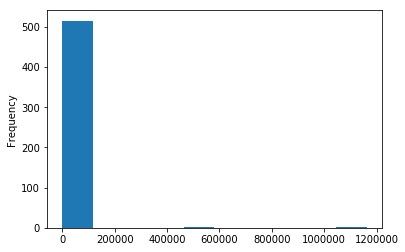

In [7]:
#histograma dos erros
hist_plot = squared_errors.plot('hist')

In [8]:
# Função para calcular o desvio padrão
def calc_desvio_padrao(variable, bias = 0):
    observations = float(len(variable))
    return np.sqrt(np.sum((variable - np.mean(variable))**2) / (observations - min(bias, 1)))

In [9]:
# Imprimindo o desvio padrão via fórmula e via NumPy da variável temp
print ('Resultado da Função: %0.5f Resultado do Numpy: %0.5f' % (calc_desvio_padrao(data['temp']), np.std(data['temp'])))

Resultado da Função: 5.80101 Resultado do Numpy: 5.80101


In [10]:
# Funções para calcular a variância da variável temp e a correlação com a variável target
def covariance(variable_1, variable_2, bias = 0):
    observations = float(len(variable_1))
    return np.sum((variable_1 - np.mean(variable_1)) * (variable_2 - np.mean(variable_2))) / (observations - min(bias,1))

def standardize(variable):
    return (variable - np.mean(variable)) / np.std(variable)

def correlation(var1, var2, bias = 0):
    return covariance(standardize(var1), standardize(var2), bias)

In [11]:
# Compara o resultado das nossas funções com a função pearsonr do SciPy
from scipy.stats.stats import pearsonr
print ('Nossa estimativa de Correlação: %0.5f' % (correlation(data['temp'], data['target'])))
print ('Correlação a partir da função pearsonr do SciPy: %0.5f' % pearsonr(data['temp'], data['target'])[0])

Nossa estimativa de Correlação: 0.09784
Correlação a partir da função pearsonr do SciPy: 0.09784


In [12]:
# Definindo o range dos valores de x e y
x_range = [data['temp'].min(),data['temp'].max()]
y_range = [data['target'].min(),data['target'].max()]

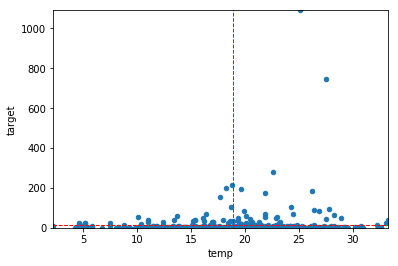

In [13]:
# Plot dos valores de x e y com a média
scatter_plot = data.plot(kind = 'scatter', x = 'temp', y = 'target', xlim = x_range, ylim = y_range)

# Cálculo da média
meanY = scatter_plot.plot(x_range, [data['target'].mean(),data['target'].mean()], '--', color = 'red', linewidth = 1)
meanX = scatter_plot.plot([data['temp'].mean(), data['temp'].mean()], y_range, '--', color = 'red', linewidth = 1)

In [14]:
# Gerando número de observações e variáveis
observations = len(data)
variables = data.columns[:-1]

In [15]:
# Coletando x e y
X = data[['FFMC','DMC','DC', 'ISI','temp', 'RH', 'wind', 'rain']]
y = data['target'].values

In [16]:
# Variáveis explanatórias
X.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


In [17]:
# Variável target
y

array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.000

# Usando multiplos atributos com statsmodels

In [18]:
Xc = sm.add_constant(X)
modelo = sm.OLS(y, Xc)
modelo_v1 = modelo.fit()

In [19]:
modelo_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.033
Date:                Thu, 27 Feb 2020   Prob (F-statistic):              0.410
Time:                        07:46:17   Log-Likelihood:                -2876.3
No. Observations:                 517   AIC:                             5771.
Df Residuals:                     508   BIC:                             5809.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4938     62.048      0.040      0.968    -119.409     124.396
FFMC          -0.0233      0.661     -0.035      0.972      -1.322       1.275
DMC            0.0765      0.067      1.145      0.253      -0.055       0.208
DC            -0.0057      0.016     -0.349      0.727      -0.038       0.026
ISI           -0.6984      0.772     -0.905      0.366      -2.215       0.818
temp           0.8480      0.787      1.077      0.282      -0.699       2.394
RH            -0.1963      0.237     -0.829      0.407      -0.661       0.269
wind           1.5271      1.670      0.914      0.361      -1.754       4.808
rain          -2.5400      9.676     -0.263      0.793     -21.549      16.469
==============================================================================
Omnibus:                      978.059   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           792201.920
Skew:                          12.652   Prob(JB):                         0.00
Kurtosis:                     193.092   Cond. No.                     1.38e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
# Gerando a matriz
X = data[['FFMC','DMC','DC', 'ISI','temp', 'RH', 'wind', 'rain']]
matriz_corr = X.corr()
print (matriz_corr)

          FFMC       DMC        DC       ISI      temp        RH      wind  \
FFMC  1.000000  0.382619  0.330512  0.531805  0.431532 -0.300995 -0.028485   
DMC   0.382619  1.000000  0.682192  0.305128  0.469594  0.073795 -0.105342   
DC    0.330512  0.682192  1.000000  0.229154  0.496208 -0.039192 -0.203466   
ISI   0.531805  0.305128  0.229154  1.000000  0.394287 -0.132517  0.106826   
temp  0.431532  0.469594  0.496208  0.394287  1.000000 -0.527390 -0.227116   
RH   -0.300995  0.073795 -0.039192 -0.132517 -0.527390  1.000000  0.069410   
wind -0.028485 -0.105342 -0.203466  0.106826 -0.227116  0.069410  1.000000   
rain  0.056702  0.074790  0.035861  0.067668  0.069491  0.099751  0.061119   

          rain  
FFMC  0.056702  
DMC   0.074790  
DC    0.035861  
ISI   0.067668  
temp  0.069491  
RH    0.099751  
wind  0.061119  
rain  1.000000  


In [21]:
# Criando um Correlation Plot
def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar = 0)
    R[np.where(np.abs(R) < hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap = mpl.cm.coolwarm, alpha = 0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor = False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor = False)
    heatmap.axes.set_xticklabels(variables, minor = False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor = False)
    plt.tick_params(axis = 'both', which = 'both', bottom = 'off', top = 'off', left = 'off', right = 'off') 
    plt.colorbar()
    plt.show()

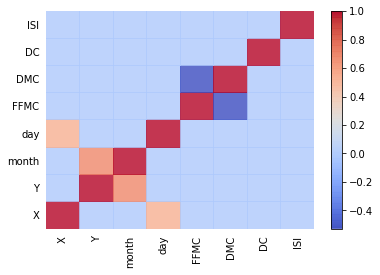

In [22]:
# Visualizando o Plot
visualize_correlation_matrix(X, hurdle = 0.5)

# Fazendo previsões com o Modelo de Regressão Linear Múltipla

In [23]:
# Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [24]:
# Carregando o dataset
data = pd.read_csv('forest.csv')
data['target'] = data.area

In [25]:
# Formato do Dataset
print("fire forest dataset tem {} observações com {} variáveis cada uma.".format(*data.shape))

fire forest dataset tem 517 observações com 14 variáveis cada uma.


In [26]:
# Coletando x e y
# Usaremos como variáveis explanatórias somente as 8 variáveis 
X = data[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']]
y = data['target'].values

In [27]:
X.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


In [28]:
y

array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.000

In [29]:
# Divisão em dados de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [30]:
# Cria o modelo
modelo = LinearRegression(normalize = False, fit_intercept = True)

In [31]:
# Treina o modelo
modelo_v2 = modelo.fit(X_train, y_train)

In [32]:
# Calcula a métrica R2 do nosso modelo
r2_score(y_test, modelo_v2.fit(X_train, y_train).predict(X_test))

0.0006576927283136191

In [33]:
# Produz a matriz com os novos dados de entrada para a previsão
[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']]
FFMC = 90.644681
DMC = 110.872340
DC = 547.940039
ISI = 9.021663
temp = 18.889168
RH = 44.288201
wind = 4.017602
rain = 0.021663

# Lista com os valores das variáveis
forest_data = [FFMC, DMC, DC, ISI, temp, RH, wind, rain]

# Reshape
Xp = np.array(forest_data).reshape(1, -1)

# Previsão
print("Area média queimada em ha:", modelo_v2.predict(Xp))

Area média queimada em ha: [10.97146101]


In [35]:
#Acurácia do modelo
acuracia = (modelo_v2.predict(Xp)/12.847292)*100
print(acuracia)

[85.39901643]
